In [1]:
import cv2
import numpy as np
import os
from PIL import Image


# 椒盐噪声
def SaltAndPepper(src,percetage=0.05):
    SP_NoiseImg=src.copy()
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(SP_NoiseNum):
        randR=np.random.randint(0,src.shape[0]-1)
        randG=np.random.randint(0,src.shape[1]-1)
        randB=np.random.randint(0,3)
        if np.random.randint(0,1)==0:
            SP_NoiseImg[randR,randG,randB]=0
        else:
            SP_NoiseImg[randR,randG,randB]=255
    return SP_NoiseImg


def operate(currentPath, filename, targetPath):
    # 读取图像
    image = Image.open(currentPath)
    image_cv = cv2.imread(currentPath)
    # image.show()
    img_noise = SaltAndPepper(image_cv) 
    cv2.imwrite(targetPath+'/'+filename,img_noise )
    #img_noise.save(targetPath+filename)


data_train = 'Alzheimer_s Dataset/train' 
for parent, dirnames, filenames in os.walk(data_train):
    for filename in filenames:
        # print('parent is:' + parent)
        print('filename is: ' + filename)
        dir = parent.split('\\')[-1]
        # 把文件名添加到一起后输出
        currentPath = os.path.join(parent, filename)
        print('the full name of file is :' + currentPath)
        # 保存处理后的图片的目标文件夹
        targetPath = f'Alzheimer_s Dataset/NB-train/SaltNoise/{dir}/'
        # 进行处理
        operate(currentPath, filename, targetPath)

data_test = 'Alzheimer_s Dataset/test'
 
"""for parent, dirnames, filenames in os.walk(data_test):
    for filename in filenames:
        # print('parent is:' + parent)
        print('filename is: ' + filename)
        dir = parent.split('\\')[-1]
        # 把文件名添加到一起后输出
        currentPath = os.path.join(parent, filename)
        print('the full name of file is :' + currentPath)
        # 保存处理后的图片的目标文件夹
        targetPath = f'Alzheimer_s Dataset/NB-test/SaltNoise/{dir}/'
        # 进行处理
        operate(currentPath, filename, targetPath)
"""


filename is: mildDem0.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem0.jpg
filename is: mildDem1.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem1.jpg
filename is: mildDem10.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem10.jpg
filename is: mildDem100.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem100.jpg
filename is: mildDem101.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem101.jpg
filename is: mildDem102.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem102.jpg
filename is: mildDem103.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem103.jpg
filename is: mildDem104.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem104.jpg
filename is: mildDem105.jpg
the full name of file is :Alzheimer_s Dataset/train\MildDemented\mildDem105.jpg
filename is: mildDem106.jpg
the full n

"for parent, dirnames, filenames in os.walk(data_test):\n    for filename in filenames:\n        # print('parent is:' + parent)\n        print('filename is: ' + filename)\n        dir = parent.split('\\')[-1]\n        # 把文件名添加到一起后输出\n        currentPath = os.path.join(parent, filename)\n        print('the full name of file is :' + currentPath)\n        # 保存处理后的图片的目标文件夹\n        targetPath = f'Alzheimer_s Dataset/NB-test/SaltNoise/{dir}/'\n        # 进行处理\n        operate(currentPath, filename, targetPath)\n"

In [2]:
train_root  = "Alzheimer_s Dataset/NB-train/SaltNoise"
test_root = "Alzheimer_s Dataset/test"

In [3]:
batch_size = 5

from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size, shuffle= False)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


4


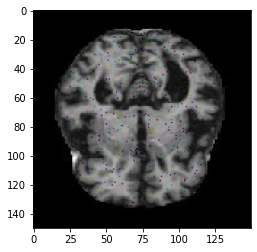

In [4]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][0]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
class SeBlock(keras.layers.Layer):   
    def __init__(self, channels, reduction=4,**kwargs):
        super(SeBlock,self).__init__(**kwargs)
        self.reduction = reduction
        self.avgpool = keras.layers.GlobalAveragePooling2D()
        self.fc1 = keras.layers.Dense(int(channels) // self.reduction, use_bias=False,activation=keras.activations.relu)
        self.fc2 = keras.layers.Dense(int(channels), use_bias=False,activation=keras.activations.hard_sigmoid)
    def call(self, inputs):
        x = self.avgpool(inputs)
        x = self.fc1(x)
        x = self.fc2(x)
        return keras.layers.Multiply()([inputs, x])
        # x = (inputs)
        # x = (x)
        # x = keras.layers.Dense(int(inputs.shape[-1]), use_bias=False,activation=keras.activations.hard_sigmoid)(x)
        # return keras.layers.Multiply()([inputs,x])    #给通道加权重
        #return inputs*x   
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(SeBlock(32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(SeBlock(32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(SeBlock(64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(SeBlock(64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 se_block (SeBlock)          (None, 148, 148, 32)      512       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 se_block_1 (SeBlock)        (None, 72, 72, 32)        512       
                                                        

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_data, batch_size = batch_size, epochs=100)

Epoch 1/100
1025/1025 [==============================] - 197s 187ms/step - loss: 1.2089 - accuracy: 0.4608
Epoch 2/100
1025/1025 [==============================] - 192s 187ms/step - loss: 1.0586 - accuracy: 0.4925
Epoch 3/100
1025/1025 [==============================] - 191s 186ms/step - loss: 1.0364 - accuracy: 0.5091
Epoch 4/100
1025/1025 [==============================] - 192s 187ms/step - loss: 0.9969 - accuracy: 0.5163
Epoch 5/100
1025/1025 [==============================] - 202s 197ms/step - loss: 0.9430 - accuracy: 0.5315
Epoch 6/100
1025/1025 [==============================] - 197s 192ms/step - loss: 0.9216 - accuracy: 0.5487
Epoch 7/100
1025/1025 [==============================] - 188s 183ms/step - loss: 0.9252 - accuracy: 0.5565
Epoch 8/100
1025/1025 [==============================] - 192s 187ms/step - loss: 0.8442 - accuracy: 0.5948
Epoch 9/100
1025/1025 [==============================] - 184s 180ms/step - loss: 0.8102 - accuracy: 0.6069
Epoch 10/100
1025/1025 [=============

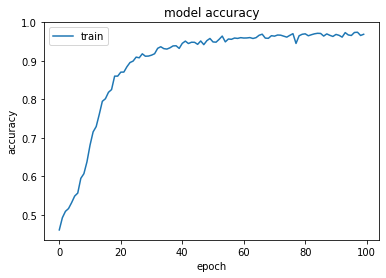

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

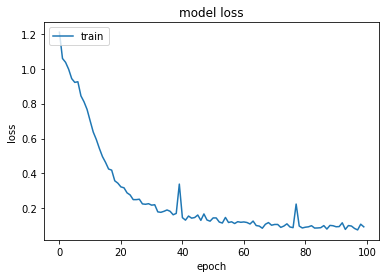

In [8]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

256/256 [==============================] - 12s 43ms/step


<AxesSubplot:>

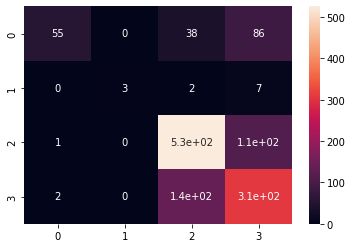

In [9]:
import seaborn as sns
import numpy as np 
predict_x = model.predict(test_data) 
pred=np.argmax(predict_x,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)

In [10]:
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))

0.04534792806880375


In [11]:
score = model.evaluate(test_data)
print(score)

256/256 [==============================] - 12s 43ms/step - loss: 2.2945 - accuracy: 0.6974
[2.2945449352264404, 0.6974198818206787]


In [12]:
from keras.models import Model


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[10][0][0].reshape(1,150,150,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

1/1 [==============================] - 1s 661ms/step


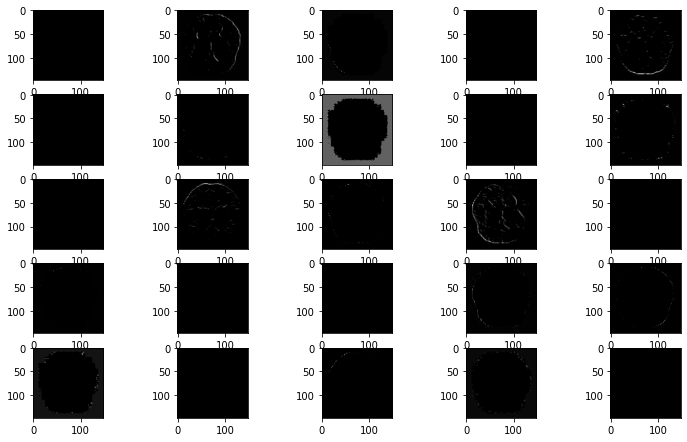

In [13]:
display_activation(activations, 5, 5, 1)

In [ ]:
from __future__ import absolute_import, division, print_functionfrom tqdm 
import tqdmfrom numpy.random 
import randn import pathlibimport randomimport matplotlib.pyplot as plt 
import tensorflow as tfimport numpy as np 
from matplotlib.image 
import imreadfrom keras.preprocessing 
import image tf.enable_eager_execution() 
AUTOTUNE = tf.data.experimental.AUTOTUNE 
data_dir = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
data_dir = pathlib.Path(data_dir) 
label_names={'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
label_key=['daisy','dandelion','roses','sunflowers','tulips']

In [39]:
import random


data_dir = "Alzheimer"
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images) 
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images] 
data_size=len(all_images)
train_test_split=(int)(data_size*0.2) 
x_train=all_images[train_test_split:]
x_test=all_images[:train_test_split]
y_train=all_labels[train_test_split:]
y_test=all_labels[:train_test_split] 
IMG_SIZE=160 
BATCH_SIZE = 32 
def _parse_data(x,y): 
    image = tf.read_file(x) 
    image = tf.image.decode_jpeg(image, channels=3) 
    image = tf.cast(image, tf.float32) 
    image = (image/127.5) - 1 
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  
    return image,y 
def _input_fn(x,y): 
    ds=tf.data.Dataset.from_tensor_slices((x,y)) 
    ds=ds.map(_parse_data) 
    ds=ds.shuffle(buffer_size=data_size)   
    ds = ds.repeat()  
    ds = ds.batch(BATCH_SIZE)  
    ds = ds.prefetch(buffer_size=AUTOTUNE)  
    return ds 
train_ds=_input_fn(x_train,y_train)
validation_ds=_input_fn(x_test,y_test)

AttributeError: 'str' object has no attribute 'glob'

In [35]:


model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_ds, epochs=100,  steps_per_epoch=2, validation_steps=2, validation_data=validation_ds)

Epoch 1/100
 108/1025 [==>...........................] - ETA: 3:05 - loss: 0.1163 - accuracy: 0.9667

KeyboardInterrupt: 

In [ ]:
validation_steps = 20 
loss0,accuracy = model.evaluate(validation_ds, steps = validation_steps)
print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy))

IndexError: tuple index out of range

In [24]:
validation_steps = 20 
loss0,accuracy0 = model.evaluate(validation_ds, steps = validation_steps) 
print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

NameError: name 'validation_ds' is not defined

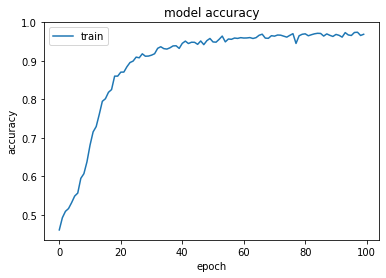

In [21]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

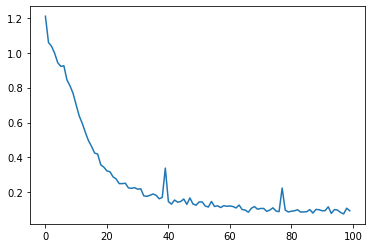

In [22]:
# 损失函数
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()